In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
from numpy import pi

#__NEW__
#determining rho_0 with 3pF model and empirical parameters via numerical integration.

w, c,z = -0.051,  2.608, 0.513
Z = 8
A = 16

# nuclear model multiplied by r^2 in prep for Normalization
def f(r):

  x = np.exp(-1*(r-c)/z)
  return (1+ w*r**2/c**2)*x*r**2/(1 + x)

val, err = integrate.quad(f,0,np.inf)

rho0 = A/4/pi/val
rho0 , err

(0.16536192724276907, 1.0923136461115587e-07)

# We Have four Scenarios to Consider Here.

1. __NEW:__ The __Three parameter Fermi model__ using __empirical__ parameters for $w$, $R$ and $\delta$ and determining $\rho_0$ by __integration__
2.__NEW-2:__ The __Two parameter Fermi model__ using __empirical__ parameters for $R$ and $\delta$ and determining $\rho_0$ by __integration__
3. __OLD:__  The __Two parameter Fermi model__ using __theoretical__ parameters for $R$ and $\delta$ and chose $\rho_0$ using the __STARlight expression__
4.__OLD-I:__ The __Two parameter Fermi model__ using __theoretical__ parameters for $R$ and $\delta$ and determined  $\rho_0$ by __integration__

In [ ]:
#__NEW-2__
#Determining the value of rho_0 if the 3pF is converted to a 2pF - retaining the empirical parameters
w = 0
val,err =integrate.quad(f,0,np.inf)
rho02 = A/4/pi/val
rho02 , err

(0.1557942905424931, 1.0327065977333759e-07)

In [ ]:
#__OLD__
#The value of rho_0 in the old starlight

rho0_old =0.138/(1.13505-0.0004283*A)
R = 1.2*A**(1/3)
rho0_old, R

(0.12231904138744543, 3.0238105197476957)

In [ ]:
#__OLD_I__
#Determining what the rho_0 for __OLD__ should be by integration
#resetting parameters to old starlight values
w =0
c = R
z = 0.53

valu, err = integrate.quad(f,0,np.inf)

rho0_old_I = A/(4*pi*valu)

rho0_old_I , err

(0.10600288997292362, 3.1702793580146755e-09)

In [ ]:
rrr = np.linspace(0,15,5000)

w,c,z = 0, R, 0.53

#True nuclear model (i.e. without r^2)
def g(r):
  x = np.exp(-1*(r-c)/z)
  return (1+ w*r**2/c**2)*x/(1 + x)


y_old = rho0_old *f(rrr)
y_old_I = rho0_old_I* f(rrr)

w, c,z = -0.051,  2.608, 0.513
y_new = rho0 * f(rrr)

w = 0
y_new2 = rho02 * f(rrr)

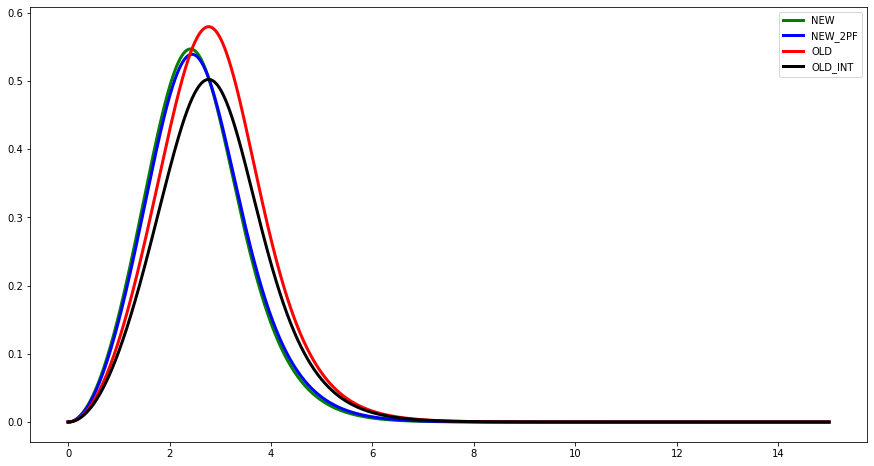

In [ ]:
fig, axis = plt.subplots(figsize =(15,8))


axis.plot(rrr,y_new, color ="green", label="NEW", linewidth = 3.0)
axis.plot(rrr,y_new2, color="blue", label="NEW_2PF", linewidth = 3.0)
axis.plot(rrr,y_old,color="red", label="OLD", linewidth = 3.0)
axis.plot(rrr,y_old_I,color="black", label="OLD_INT", linewidth = 3.0)

axis.legend()


In [ ]:
rrr = np.linspace(0,5,5000)

w,c,z = 0, R, 0.53


#True nuclear model (i.e. without r^2)
def g(r):
  x = np.exp(-1*(r-c)/z)
  return (1+ w*r**2/c**2)*x/(1 + x)


y_old = rho0_old *g(rrr)
y_old_I = rho0_old_I* g(rrr)

w, c,z = -0.051,  2.608, 0.513
y_new = rho0 * g(rrr)

w = 0
y_new2 = rho02 * g(rrr)

[(0.0, 5.0)]

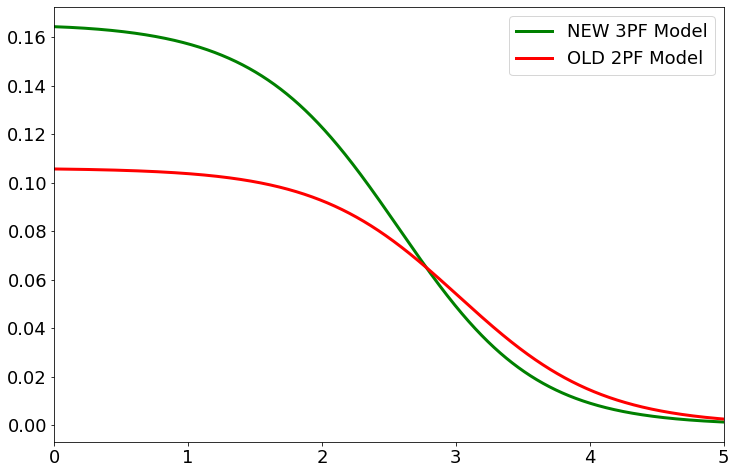

In [ ]:
afig, axis = plt.subplots(figsize =(12,8))

plt.rc('font',size=18)
axis.plot(rrr,y_new, color ="green", label="NEW 3PF Model", linewidth=3.0)
#axis.plot(rrr,y_new2, color="blue", label="NEW_2PF")
#axis.plot(rrr,y_old,color="red", label="OLD")
axis.plot(rrr,y_old_I,color="red",label="OLD 2PF Model",linewidth=3.0)# label="OLD_INT")

axis.legend()

axis.set(xlim=(0,5))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
from numpy import pi

w, c,z = 0,  2.608, 0.53 #2 parameter fermi model

# nuclear model multiplied by r^2 in prep for Normalization
def f(r,c):

  x = np.exp(-1*(r-c)/z)
  return (1+ w*r**2/c**2)*x*r**2/(1 + x)

def rho(R,AA):
  val, err = integrate.quad(f,0,np.inf,args=(R,))
  rho0 = AA/4/pi/val
  return rho0

def R(A):
  R0 = 1.2 #1.2fm
  return R0*A**(1.0/3.0)

def r000(A):
  return 0.138/(1.13505 - 0.0004283*A)

In [ ]:
a0 = np.arange(7.0,210.0)
R0 = np.arange(7.0,210.0)
ro1 = r000(a0)
r02 = np.arange(7.0,210.0)
countt =0
for a in a0:
  R99 = R(a*1.0)
  r02[countt] = rho(R99,a)
  R0[countt] = R99
  countt += 1
#ro1,r02,R0
a0, ro1, r02

(array([  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
         29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
         40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
         51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
         62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
         95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
        106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
        117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
        128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138.,
        139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149.,
        150., 151., 152., 153., 154., 

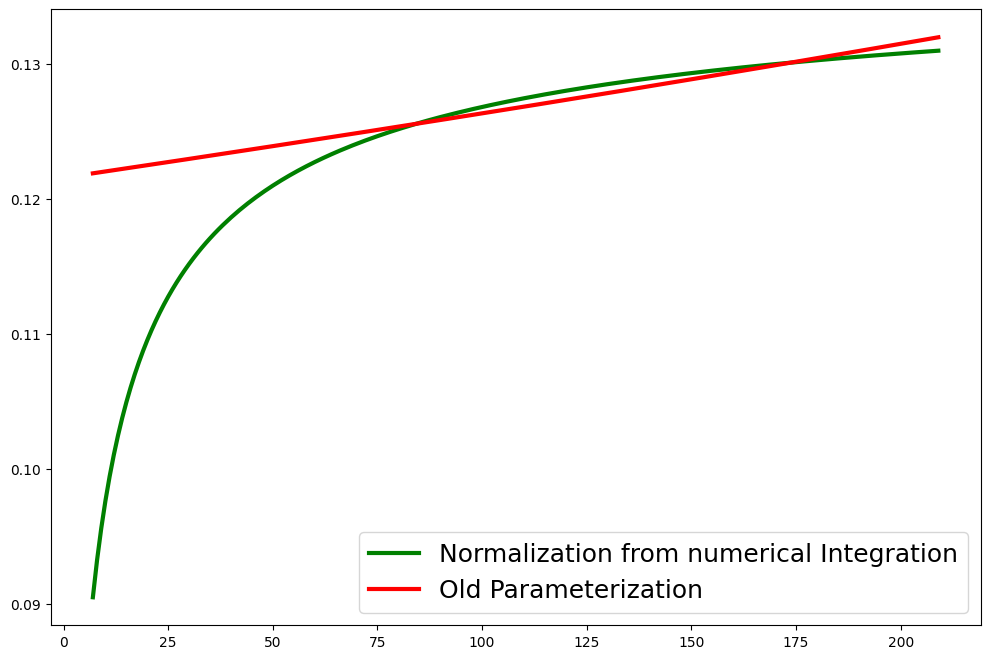

In [ ]:
afig, axis = plt.subplots(figsize =(12,8))

plt.rc('font',size=18)
axis.plot(a0,r02, color ="green", label="Normalization from numerical Integration", linewidth=3.0)
#axis.plot(rrr,y_new2, color="blue", label="NEW_2PF")
#axis.plot(rrr,y_old,color="red", label="OLD")
axis.plot(a0,ro1,color="red",label="Old Parameterization",linewidth=3.0)# label="OLD_INT")

axis.legend()

#axis.set(xlim=(0,5))

In [ ]:
ee11 = (r02 - ro1)
ee11s = sum(ee11**2)/201
ee11s**.5, ee11s, max(np.abs(ee11)), min(np.abs(ee11))

(0.006217130281063469,
 3.8652708931716325e-05,
 0.031433239810480545,
 6.394269684378839e-06)

In [ ]:
VV = np.vstack((a0,a0*r02, np.ones_like(r02)))
AA2 = VV.T

zz = np.dot(AA2.T,AA2)
zz = np.linalg.inv(zz)
zz

array([[ 0.0174228 , -0.13072209, -0.0755828 ],
       [-0.13072209,  0.98087974,  0.56597681],
       [-0.0755828 ,  0.56597681,  0.34823217]])

In [ ]:
ans = np.dot(np.dot(zz,VV), r02)

In [ ]:
def r001(A):
  #g,h,i = 0.0765756, -0.061707041, 0.0083363
  g,h,i = 0.07793395, -0.05960866, 0.00805564
  return (i*A + g)/(1- h*A) #0.138/(1.13505 - 0.0004283*A)
r001(16)

0.10586072990236728

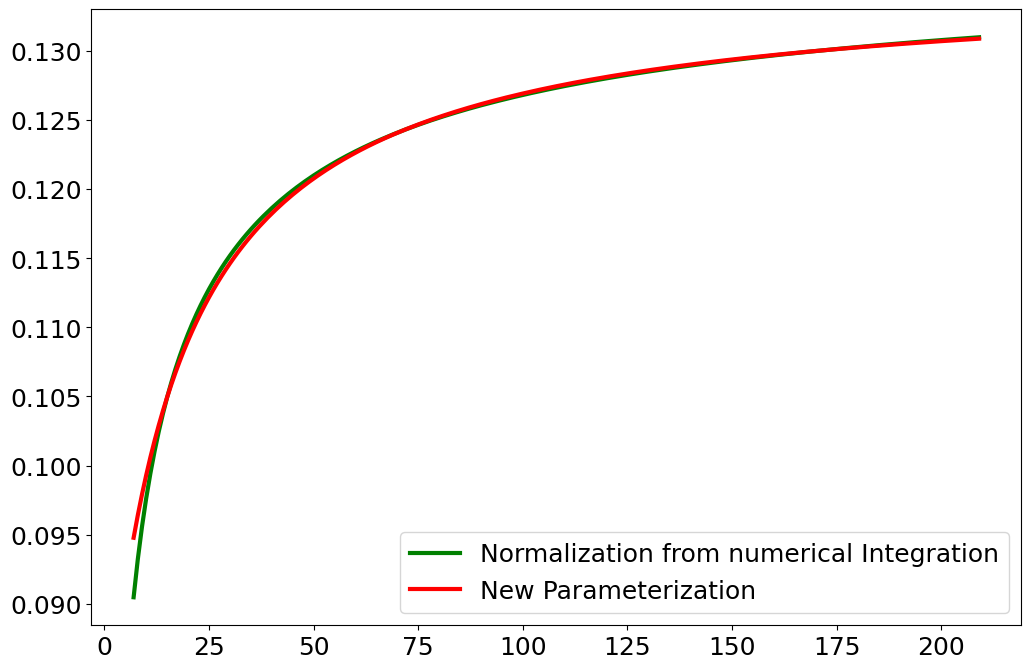

In [ ]:
roo2 = r001(a0)

afig, axis = plt.subplots(figsize =(12,8))

plt.rc('font',size=18)
axis.plot(a0,r02, color ="green", label="Normalization from numerical Integration", linewidth=3.0)
#axis.plot(rrr,y_new2, color="blue", label="NEW_2PF")
#axis.plot(rrr,y_old,color="red", label="OLD")
axis.plot(a0,roo2,color="red",label="New Parameterization",linewidth=3.0)# label="OLD_INT")

axis.legend()



In [ ]:
ee12 = r02 - roo2
ee12s = sum(ee12**2)/200
ee12s**.5, ee12s, max(np.abs(ee12)), min(np.abs(ee12))

(0.00048556286442190004,
 2.357712953056005e-07,
 0.004307504186237529,
 3.713868458599112e-07)

In [ ]:
import numpy as np
from scipy.optimize import root

w, c,z = -0.051,  2.608, 0.513

#True nuclear model (i.e. without r^2)
def g(r):
  x = np.exp(-1*(r-c)/z)
  return (1+ w*r**2/c**2)*x/(1 + x)

def h(r):
  return g(r)-g(0.0)/2.0

x0 = c
result = root(h,x0)
result.x[0]

2.561523729909811

In [ ]:
# for checking the values for inverse law cases
a_1 = 1/a0
atb = sum(a_1*r02)
ata = sum(a_1*a_1)
k = atb/ata
k

2.685506197799567

In [ ]:
def r003(A):
  return k/A
r003(16)

0.16784413736247294

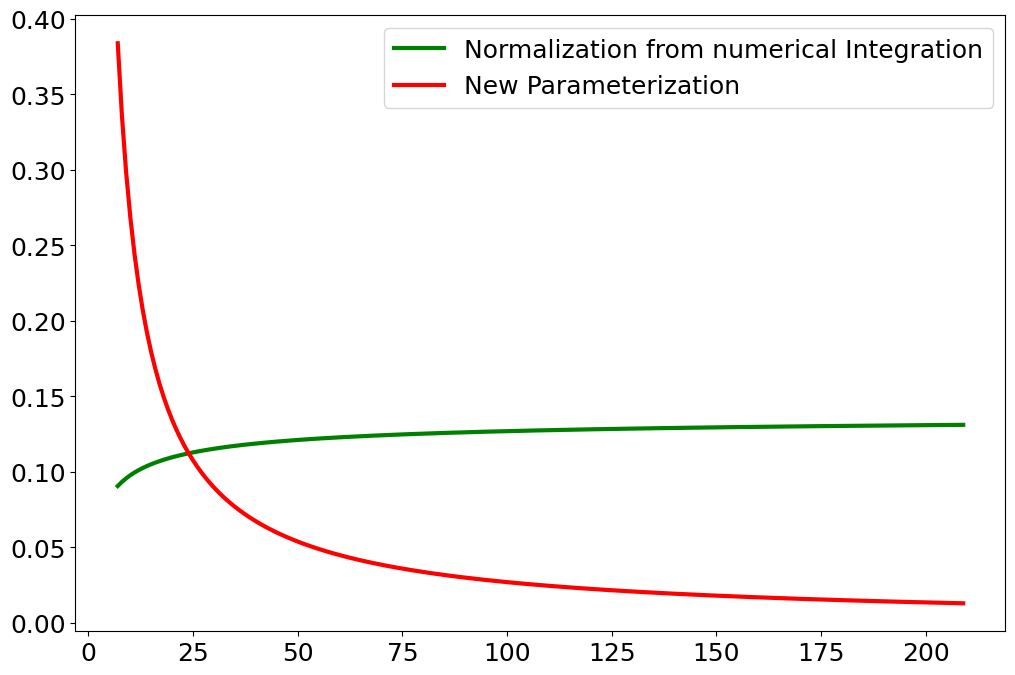

In [ ]:
roo3b = r003(a0)

afig, axis = plt.subplots(figsize =(12,8))

plt.rc('font',size=18)
axis.plot(a0,r02, color ="green", label="Normalization from numerical Integration", linewidth=3.0)
#axis.plot(rrr,y_new2, color="blue", label="NEW_2PF")
#axis.plot(rrr,y_old,color="red", label="OLD")
axis.plot(a0,roo3b,color="red",label="New Parameterization",linewidth=3.0)# label="OLD_INT")

axis.legend()

In [ ]:
# for checking inverse law with linear portion
VV_c = np.vstack((1.0/a0, np.ones_like(r02)))
AA2_c = VV_c.T

zz_c= np.dot(AA2_c.T,AA2_c)
zz_c = np.linalg.inv(zz_c)
zz_c

array([[ 1.11868354e+01, -1.91330174e-01],
       [-1.91330174e-01,  8.19845788e-03]])

In [ ]:
np.dot(np.dot(zz_c,VV_c), r02)

array([-0.36145584,  0.13056169])

In [ ]:
def r004(A):
  return 0.13056169 -0.36145584/A
r004(16)

0.1079707

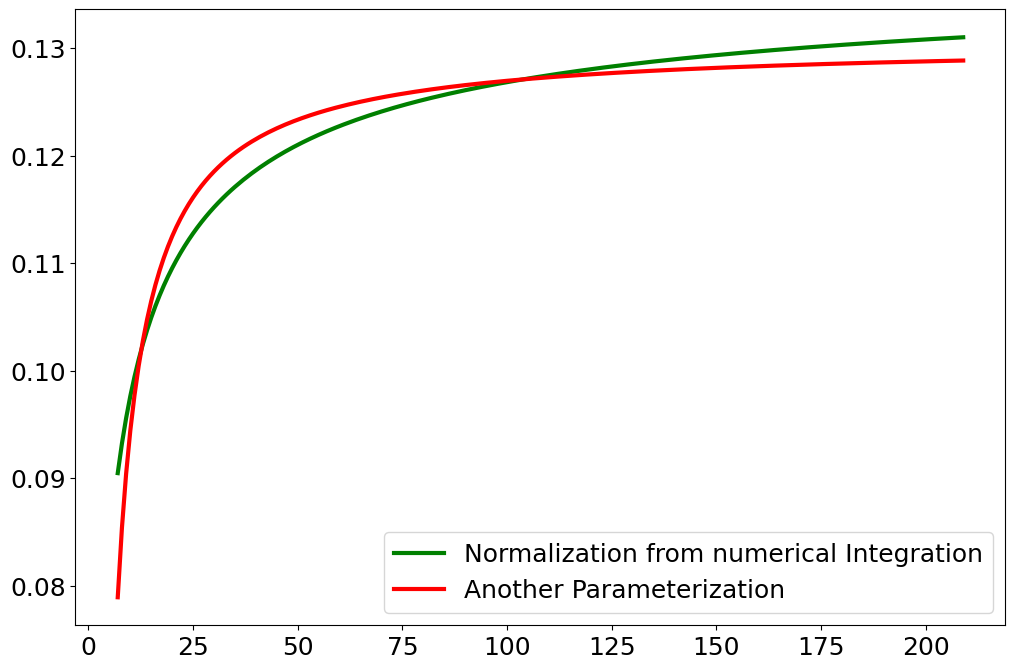

In [ ]:
roo4b = r004(a0)

afig, axis = plt.subplots(figsize =(12,8))

plt.rc('font',size=18)
axis.plot(a0,r02, color ="green", label="Normalization from numerical Integration", linewidth=3.0)
#axis.plot(rrr,y_new2, color="blue", label="NEW_2PF")
#axis.plot(rrr,y_old,color="red", label="OLD")
axis.plot(a0,roo4b,color="red",label="Another Parameterization",linewidth=3.0)# label="OLD_INT")

axis.legend()

In [ ]:
ee13 = r02 - roo4b
ee13s = sum(ee13**2)/201
ee13s**.5, ee13s, max(np.abs(ee13)), min(np.abs(ee13))

(0.002031343153148,
 4.126355005841259e-06,
 0.01154415697496454,
 5.075063666676316e-06)